## IT Salary Survey 

#### Brief/Background about the dataset
An anonymous salary survey has been conducted annually since 2015 among European IT specialists with a stronger focus on Germany. This year 1238 respondents volunteered to participate in the survey. The data has been made publicly available by the authors.
The dataset contains rich information about the salary patterns among the IT professionals in the EU region and offers some great insights.

# 1.Data Understanding

## 1a) Loading Necessary Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

## 1b) Loading the data

In [2]:
df=pd.read_csv('C:/Users/dell/Desktop/StatsFolder/EDA_DataSets/IT_Survey_Data/ITSalarySurveyEU2020.csv')
original_data=df.copy()

In [3]:
# viewing the data
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [5]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
df.shape

(1253, 23)

In [6]:
print("IT Salary Survey dataset  has {0} columns and {1} rows".format(df.shape[0],df.shape[1]));

IT Salary Survey dataset  has 1253 columns and 23 rows


In [7]:
#Printing all the columns present in data
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

## Renaming some columns
##### (Since the column names were too lengthy to proceed with)

In [8]:
df.rename(columns = {'Total years of experience': 'Years_of_experience',
                       'Years of experience in Germany':'Years_of_experience_Germany','Seniority level':'Seniority_level',
                       'Your main technology / programming language': 'Main_technology',
                     'Position': 'Position',
                      'Other technologies/programming languages you use often': 'Other_technologies',
                      'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly_salary',
                     'Yearly bonus + stocks in EUR':'Yearly_bonus_and_stocks', 'Employment status':'Employment_status',
                     'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':'Annual_salary_year_ago',
                     'Annual bonus+stocks one year ago. Only answer if staying in same country':'Annual_bonus_and_stocks',
                       'Сontract duration':'Сontract_duration','Company size':'Company_size','Company type':'Company_type',
                       'Have you lost your job due to the coronavirus outbreak?':'job_lost_during_covid',
                       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week':'shorter_working_week_hrs',
                      'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR':'additional_monetary_support', 
                      'Number of vacation days': 'Vacation_Days','Main language at work': 'Language_at_work',
                      }, inplace = True)

In [9]:
# looking at the columns again (after renaming)

df.head()

,Timestamp,Age,Gender,City,Position,Years_of_experience,Years_of_experience_Germany,Seniority_level,Main_technology,Other_technologies,...,Annual_bonus_and_stocks,Vacation_Days,Employment_status,Сontract_duration,Language_at_work,Company_size,Company_type,job_lost_during_covid,shorter_working_week_hrs,additional_monetary_support
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [10]:
# A closer look at the data types present in the data
df.dtypes

Timestamp                       object
Age                            float64
Gender                          object
City                            object
Position                        object
Years_of_experience             object
Years_of_experience_Germany     object
Seniority_level                 object
Main_technology                 object
Other_technologies              object
Yearly_salary                  float64
Yearly_bonus_and_stocks         object
Annual_salary_year_ago         float64
Annual_bonus_and_stocks         object
Vacation_Days                   object
Employment_status               object
Сontract_duration               object
Language_at_work                object
Company_size                    object
Company_type                    object
job_lost_during_covid           object
shorter_working_week_hrs       float64
additional_monetary_support     object
dtype: object

## 1c) Checking for Null Values

In [11]:
#checking null values
df.isnull().sum()

Timestamp                        0
Age                             27
Gender                          10
City                             0
Position                         6
Years_of_experience             16
Years_of_experience_Germany     32
Seniority_level                 12
Main_technology                127
Other_technologies             157
Yearly_salary                    0
Yearly_bonus_and_stocks        424
Annual_salary_year_ago         368
Annual_bonus_and_stocks        639
Vacation_Days                   68
Employment_status               17
Сontract_duration               29
Language_at_work                16
Company_size                    18
Company_type                    25
job_lost_during_covid           20
shorter_working_week_hrs       880
additional_monetary_support    791
dtype: int64

In [12]:
#null value in percentage
df.isnull().sum()/df.shape[0]*100

Timestamp                       0.000000
Age                             2.154828
Gender                          0.798085
City                            0.000000
Position                        0.478851
Years_of_experience             1.276935
Years_of_experience_Germany     2.553871
Seniority_level                 0.957702
Main_technology                10.135674
Other_technologies             12.529928
Yearly_salary                   0.000000
Yearly_bonus_and_stocks        33.838787
Annual_salary_year_ago         29.369513
Annual_bonus_and_stocks        50.997606
Vacation_Days                   5.426975
Employment_status               1.356744
Сontract_duration               2.314445
Language_at_work                1.276935
Company_size                    1.436552
Company_type                    1.995211
job_lost_during_covid           1.596169
shorter_working_week_hrs       70.231445
additional_monetary_support    63.128492
dtype: float64

## Plotting Histogram to check if the data is normally distributed(for numerical columns)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Yearly_salary'}>,
        <AxesSubplot:title={'center':'Annual_salary_year_ago'}>,
        <AxesSubplot:title={'center':'shorter_working_week_hrs'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

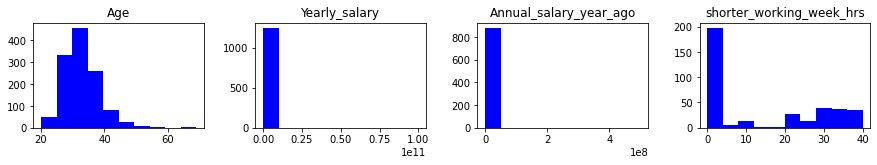

In [13]:
df.hist(layout=(5,4),color='blue',figsize=(15,12),grid=False)


### INFERENCE -
#### By looking at the garphs we can say that the data is not normally distributed for these columns.


In [14]:
# we have some non numeric columns that we need to clean up
# we have 27 NA values in Age
# we need to change Year of Experience into int dtype
# We can use coerce to handle the errors that will come for trying to covert the text to int 
# and it will replace them as Nan

In [15]:
df['Vacation_Days'] = pd.to_numeric(df['Vacation_Days'], errors = 'coerce').fillna(0).astype(int)
df['Years_of_experience'] = pd.to_numeric(df['Years_of_experience'], errors = 'coerce').fillna(0).astype(int)
df['Age'] = df['Age'].fillna(0).astype(int)
df['Yearly_salary'] = df['Yearly_salary'].astype(int)

In [16]:
#unique elements in each attribute
df.nunique()

Timestamp                      1248
Age                              41
Gender                            3
City                            119
Position                        148
Years_of_experience              34
Years_of_experience_Germany      53
Seniority_level                  24
Main_technology                 256
Other_technologies              562
Yearly_salary                   201
Yearly_bonus_and_stocks         168
Annual_salary_year_ago          147
Annual_bonus_and_stocks         131
Vacation_Days                    35
Employment_status                11
Сontract_duration                 3
Language_at_work                 14
Company_size                      5
Company_type                     63
job_lost_during_covid            10
shorter_working_week_hrs         23
additional_monetary_support      59
dtype: int64

## Outlier Detection

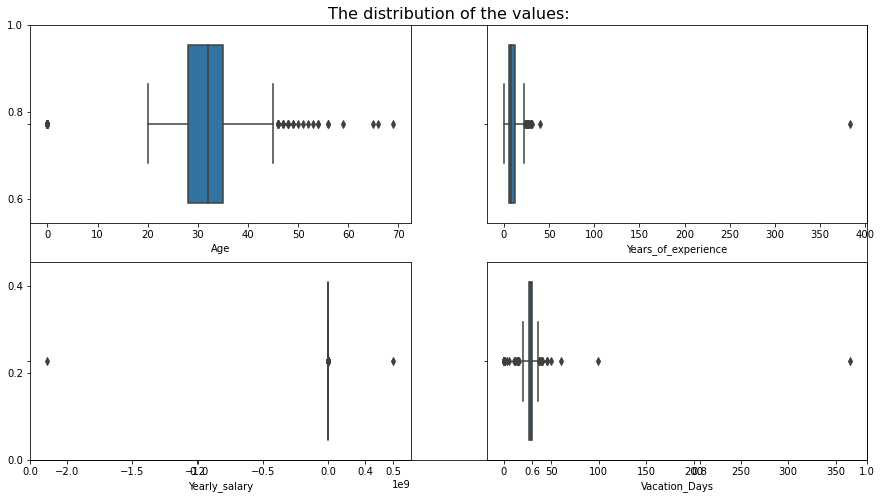

In [17]:
fig = plt.figure(figsize= (15, 8))
plt.title('The distribution of the values:', fontsize= 16)
axs = fig.subplots(nrows=2, ncols= 2)
sns.boxplot(data = df, x = 'Age', ax = axs[0,0])
sns.boxplot(data = df, x = 'Years_of_experience',ax = axs[0,1])
sns.boxplot(data = df, x = 'Yearly_salary',ax = axs[1,0])
sns.boxplot(data = df, x = 'Vacation_Days', ax= axs[1,1])
plt.show()

#### Looking at the above graphs we can see that there are outliers in the data

### Outlier Treatment/ Removing Outliers

In [18]:
def outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    df_new = dataframe.loc[(dataframe[column] > lower_boundary) & (dataframe[column] < upper_boundary)]
    return df_new

In [19]:
# the values distribution after excluding the outliers

age = outliers(df, 'Age')
experience = outliers(df, 'Years_of_experience')
salary = outliers(df, 'Yearly_salary')
vacation = outliers(df, 'Vacation_Days')

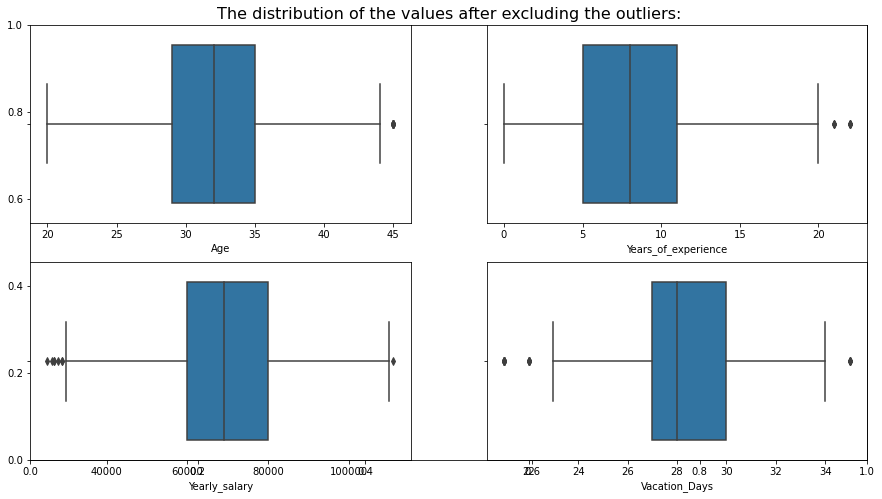

In [20]:
# the distribution of the values after excluding the outliers:

fig = plt.figure(figsize= (15, 8))
plt.title('The distribution of the values after excluding the outliers:', fontsize= 16)
axs = fig.subplots(nrows=2, ncols= 2)
sns.boxplot(data = age, x= 'Age', ax = axs[0,0])
sns.boxplot(data = experience, x= 'Years_of_experience',ax = axs[0,1])
sns.boxplot(data = salary, x= 'Yearly_salary',ax = axs[1,0])
sns.boxplot(data = vacation, x= 'Vacation_Days', ax= axs[1,1])
plt.show()

#### The number of outliers have been reduced (not completely removed)

## Univariate Analysis

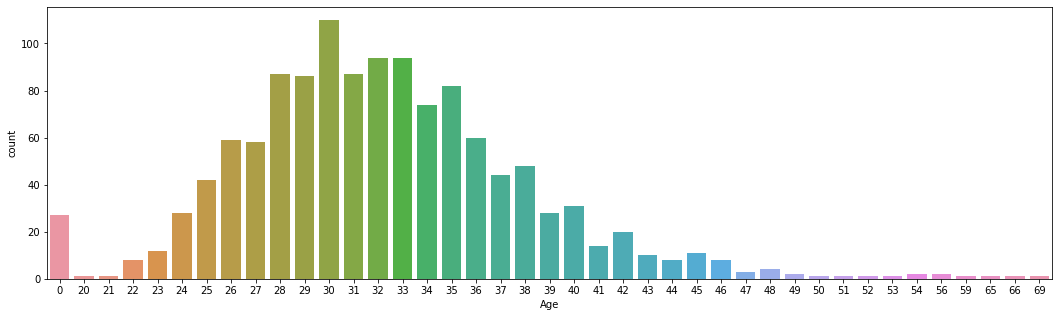

In [21]:
#Age
plt.figure(figsize=(18,5))
sns.countplot(df['Age'])
plt.show()

##### From the Age distribution we can say that majority of the IT Specialists lie in the age group of 28-33 years.

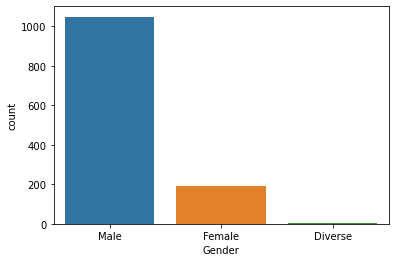

In [22]:
#Gender
sns.countplot(df['Gender'])
plt.show()

In [23]:
df['Gender'].value_counts(normalize=True)*100

Male       84.392599
Female     15.446500
Diverse     0.160901
Name: Gender, dtype: float64

#### Approximately 84% of the IT professionals are males and only 15.45% of them are females.The diverse gender is less than 1%.

In [24]:
df.groupby("Gender").mean()["Yearly_salary"]

Gender
Diverse    1.445000e+05
Female     2.662480e+06
Male       7.384706e+04
Name: Yearly_salary, dtype: float64

Text(0.5, 0, 'Count')

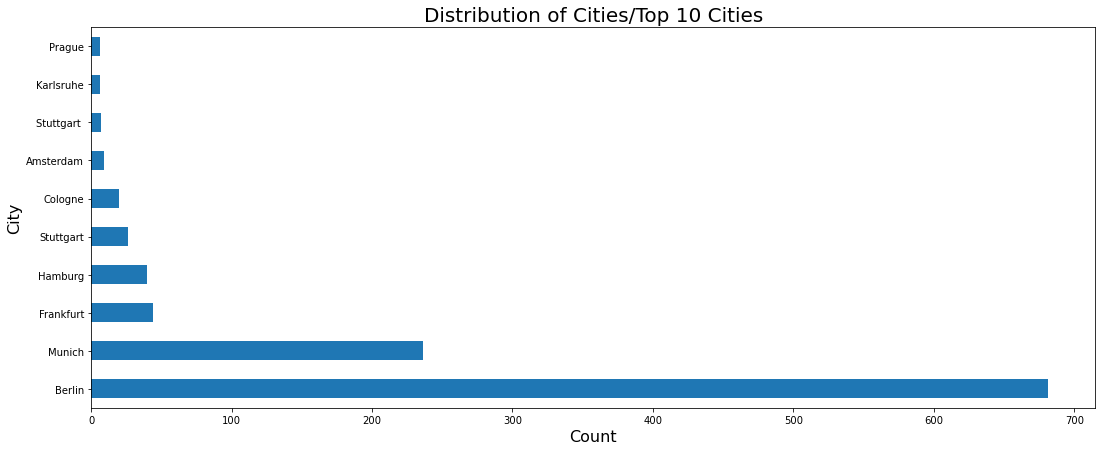

In [25]:
#Cities
plt.figure(figsize=(18,7))
df['City'].value_counts()[:10].plot(kind='barh')
plt.title("Distribution of Cities/Top 10 Cities", fontsize = 20)
plt.ylabel("City",fontsize = 16)
plt.xlabel("Count",fontsize = 16)


In [26]:
df['City'].value_counts()[:10]

Berlin        681
Munich        236
Frankfurt      44
Hamburg        40
Stuttgart      26
Cologne        20
Amsterdam       9
Stuttgart       7
Karlsruhe       6
Prague          6
Name: City, dtype: int64

In [27]:
df['City'].value_counts(normalize=True)[:10]*100

Berlin        54.349561
Munich        18.834796
Frankfurt      3.511572
Hamburg        3.192338
Stuttgart      2.075020
Cologne        1.596169
Amsterdam      0.718276
Stuttgart      0.558659
Karlsruhe      0.478851
Prague         0.478851
Name: City, dtype: float64

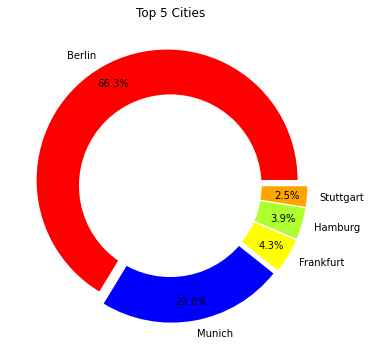

In [28]:
# DONUT CHART
# colors
colors = ['#FF0000', '#0000FF', '#FFFF00',
'#ADFF2F', '#FFA500']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.figure(figsize= (15,6))
plt.pie(df['City'].value_counts().head(5), colors=colors, labels=df['City'].value_counts().head(5).index,
autopct='%1.1f%%', pctdistance=0.85,
explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Top 5 Cities')

# Displaying Chart
plt.show()


#### Approximately 66% of the IT professionals are from Berlin and about 23% from Munich

In [29]:
group1=['Years_of_experience','Yearly_salary']

In [30]:
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

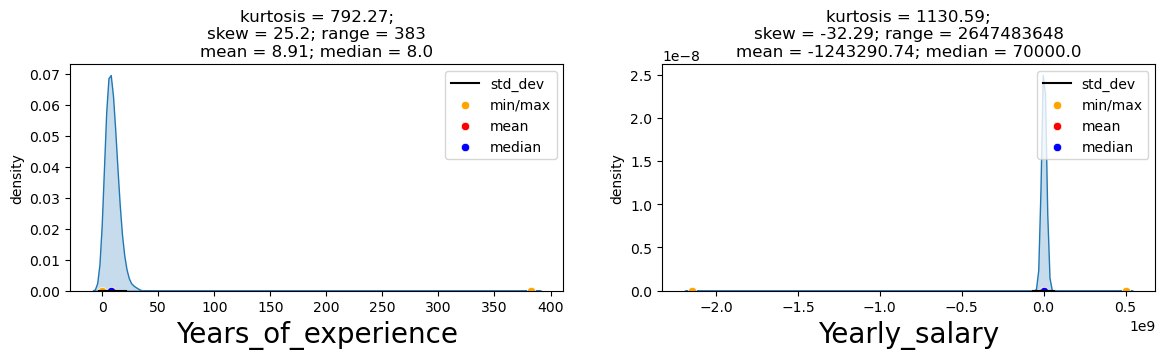

In [31]:
UVA_KDE(df,group1)

#### For years_of experience we can see that the mean experience is of 8.9 years

#### 

Text(0.5, 0, 'Seniority Level')

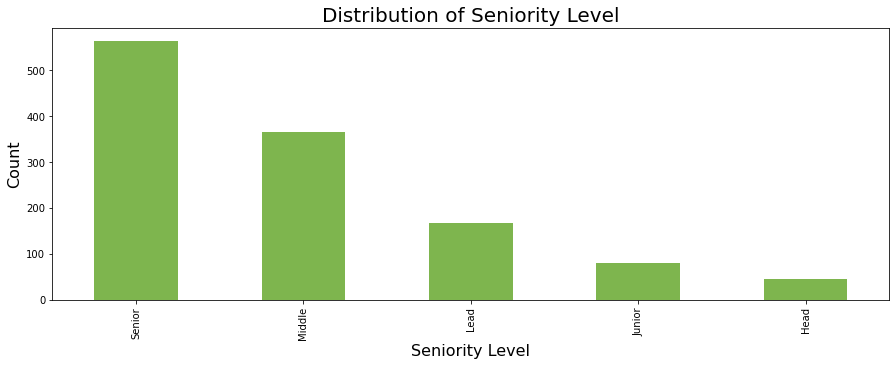

In [32]:
#Seniority_level
plt.figure(figsize=(15,5))
df['Seniority_level'].value_counts()[:5].plot(kind='bar',color='#7eb54e')
plt.title("Distribution of Seniority Level", fontsize = 20)
plt.ylabel("Count",fontsize=16)
plt.xlabel("Seniority Level",fontsize=16)

In [33]:
df['Seniority_level'].value_counts()[:5]

Senior    565
Middle    366
Lead      166
Junior     79
Head       44
Name: Seniority_level, dtype: int64

In [34]:
df['Seniority_level'].value_counts(normalize=True)[:5]*100

Senior    45.527800
Middle    29.492345
Lead      13.376309
Junior     6.365834
Head       3.545528
Name: Seniority_level, dtype: float64

#### About 45% of the professionals belong to the senior level, about 29% at the middle level of seniority and about 13% of them belong to the lead category of Seniority level.

In [35]:
df['Main_technology'].value_counts()

Java                                                184
Python                                              164
PHP                                                  56
C++                                                  38
JavaScript                                           34
                                                   ... 
pythin                                                1
Terraform, Kubernetes, AWS, GCP, Ansible, Puppet      1
T-SQL                                                 1
Network                                               1
Java / Scala                                          1
Name: Main_technology, Length: 256, dtype: int64

In [36]:
df = df.replace(['javascript','Javascript', 'js', 'JS'], 'JavaScript')
df = df.replace(['python', 'Python '], 'Python')
df = df.replace('c++', 'C++')
df = df.replace(['.net', '.Net'], '.NET')
df = df.replace(['Sql', 'sql'], 'SQL')
df = df.replace(['php','Php'], 'PHP')
df = df.replace('java', 'Java')
df = df.replace(['typescript', 'Typescript'], 'TypeScript')

Text(0.5, 0, 'Main Technology')

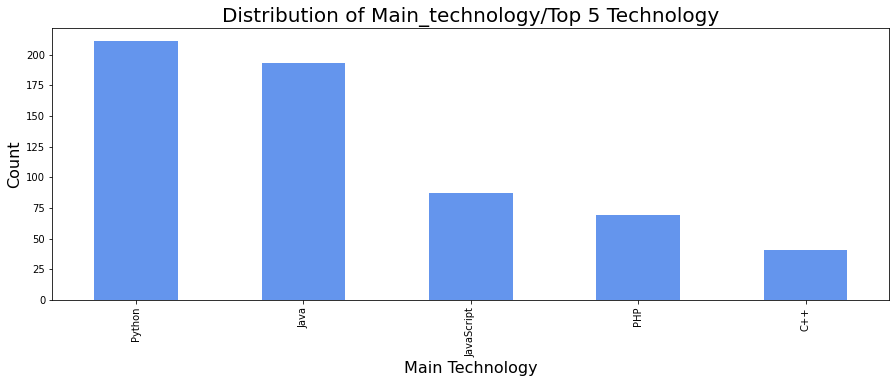

In [37]:
#Main_technology
plt.figure(figsize=(15,5))
df['Main_technology'].value_counts()[:5].plot(kind='bar',color='cornflowerblue')
plt.title("Distribution of Main_technology/Top 5 Technology",fontsize=20)
plt.ylabel("Count",fontsize=16)
plt.xlabel("Main Technology",fontsize=16)

In [38]:
df['Main_technology'].value_counts()[:5]

Python        211
Java          193
JavaScript     87
PHP            69
C++            41
Name: Main_technology, dtype: int64

In [39]:
df['Main_technology'].value_counts(normalize=True)[:10]*100

Python        18.738899
Java          17.140320
JavaScript     7.726465
PHP            6.127886
C++            3.641208
C#             2.664298
Scala          2.131439
Swift          2.131439
.NET           2.042629
TypeScript     2.042629
Name: Main_technology, dtype: float64

#### Approximately 18% IT professionals have python as their main technology (most of the IT professionals have python as their main skill) followed by Java.

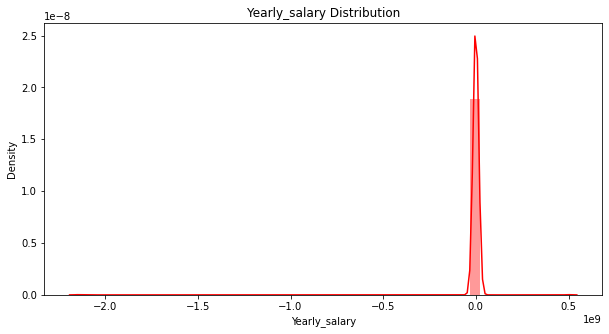

In [40]:
#Yearly Salary Distribution
plt.figure(figsize=(10,5))
sns.distplot(df["Yearly_salary"],color='r')
plt.title("Yearly_salary Distribution")
plt.show()

#### The distribution is not normal,and the data is skewed.

In [41]:
df['Yearly_salary'].value_counts()[:10]

60000     85
70000     83
65000     77
75000     73
80000     66
90000     45
85000     42
55000     35
72000     32
100000    28
Name: Yearly_salary, dtype: int64

In [42]:
df['Yearly_salary'].value_counts(normalize=True)[:10]*100

60000     6.783719
70000     6.624102
65000     6.145251
75000     5.826018
80000     5.267358
90000     3.591381
85000     3.351955
55000     2.793296
72000     2.553871
100000    2.234637
Name: Yearly_salary, dtype: float64

In [43]:
bins=[0,60000,80000,100000]
group=['Low','Average','High']
df['Salary_bin']=pd.cut(df['Yearly_salary'],bins,labels=group)

In [44]:
df['Salary_bin'].value_counts()

Average    562
Low        403
High       207
Name: Salary_bin, dtype: int64

In [45]:
df['Salary_bin'].value_counts(normalize=True)[:10]*100

Average    47.952218
Low        34.385666
High       17.662116
Name: Salary_bin, dtype: float64

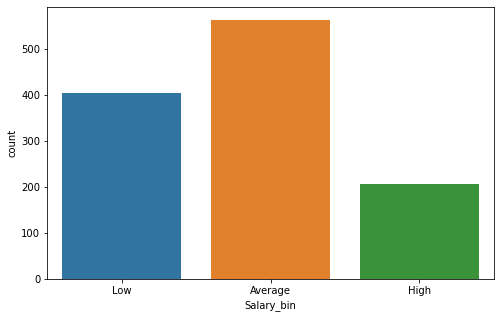

In [46]:
# Salary Distribution
plt.figure(figsize=(8,5))
sns.countplot(df['Salary_bin'])
plt.show()

#### Approximately 47% of the IT professionals fall in the Average income group,about 34% in the low income group and about 17% in the High income group.

Text(0.5, 0, 'Count')

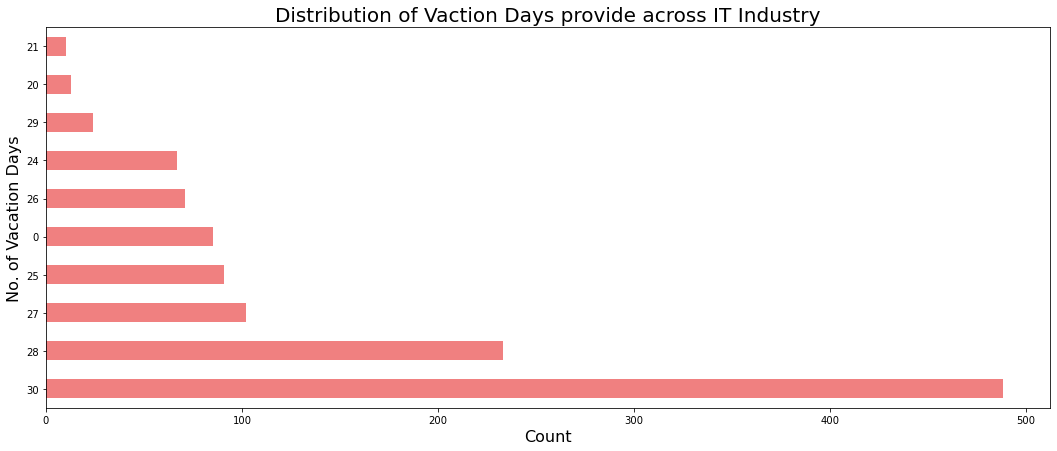

In [47]:
#Vacation Days
plt.figure(figsize=(18,7))
df['Vacation_Days'].value_counts()[:10].plot(kind='barh',color='lightcoral')
plt.title("Distribution of Vaction Days provide across IT Industry", fontsize = 20)
plt.ylabel("No. of Vacation Days",fontsize = 16)
plt.xlabel("Count",fontsize = 16)

#### Majority of the IT professionals receive 30 vacation days during the year.

In [48]:
#Employment_status

In [49]:
df['Employment_status'].value_counts()

Full-time employee                                                                 1190
Self-employed (freelancer)                                                           28
Part-time employee                                                                    8
Founder                                                                               3
Company Director                                                                      1
Full-time position, part-time position, & self-employed (freelancing, tutoring)       1
full-time, but 32 hours per week (it was my request, I'm a student)                   1
Intern                                                                                1
Working Student                                                                       1
working student                                                                       1
Werkstudent                                                                           1
Name: Employment_status, dtype: 

In [50]:
df['Employment_status'].value_counts(normalize=True)*100

Full-time employee                                                                 96.278317
Self-employed (freelancer)                                                          2.265372
Part-time employee                                                                  0.647249
Founder                                                                             0.242718
Company Director                                                                    0.080906
Full-time position, part-time position, & self-employed (freelancing, tutoring)     0.080906
full-time, but 32 hours per week (it was my request, I'm a student)                 0.080906
Intern                                                                              0.080906
Working Student                                                                     0.080906
working student                                                                     0.080906
Werkstudent                                                           

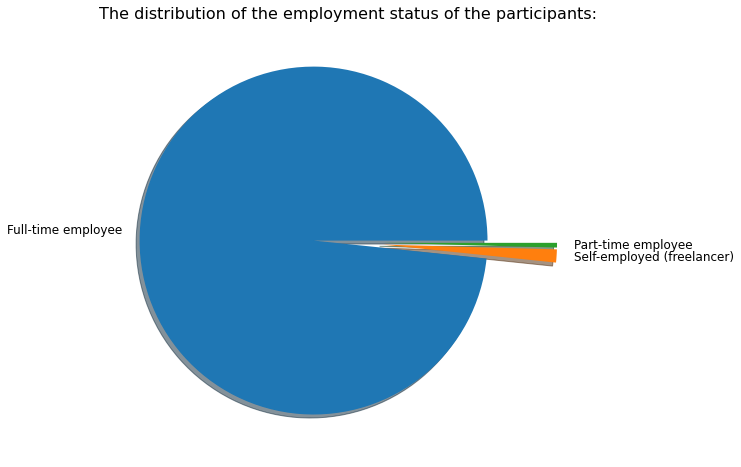

In [51]:
status = salary.loc[salary['Employment_status'].isin(['Full-time employee','Self-employed (freelancer)','Part-time employee'])]
status.shape
plt.figure(figsize= (20,8))
plt.pie(status['Employment_status'].value_counts(), labels= status['Employment_status'].value_counts().index, explode = [0.2]*3,
       textprops = {'fontsize' : 12}, shadow = True)
plt.title('The distribution of the employment status of the participants:', fontsize = 16)
plt.show()

#### About 92% of the professional are full time employees,2.2% of them are self employeed and about 0.64% of them work part time.

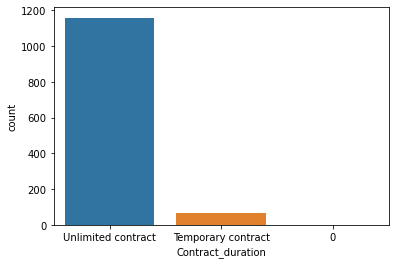

In [52]:
#Contract_Category
sns.countplot(df['Сontract_duration'])
plt.show()

In [53]:
df['Сontract_duration'].value_counts()

Unlimited contract    1159
Temporary contract      64
0                        1
Name: Сontract_duration, dtype: int64

In [54]:
df['Сontract_duration'].value_counts(normalize=True)*100

Unlimited contract    94.689542
Temporary contract     5.228758
0                      0.081699
Name: Сontract_duration, dtype: float64

#### Approximately 94% of the IT professionals have an unlimited contract and about 5% of the professionals have a temporary contract.

In [55]:
df['Language_at_work'].value_counts()

English               1020
German                 186
Russian                 12
Italian                  3
Spanish                  3
Polish                   2
English and German       2
Czech                    2
Русский                  2
Deuglisch                1
50/50                    1
both                     1
Russian, English         1
French                   1
Name: Language_at_work, dtype: int64

In [56]:
# Since the  count of other languages(Italian,Spanish etc) is very less.They are combined into a seperate category as "Others"

In [57]:
df['Language_at_work'] = df['Language_at_work'].replace({'Italian': 'Others'})
df['Language_at_work'] = df['Language_at_work'].replace({'Spanish': 'Others'})
df['Language_at_work'] = df['Language_at_work'].replace({'Polish': 'Others'})
df['Language_at_work'] = df['Language_at_work'].replace({'Czech': 'Others'})
df['Language_at_work'] = df['Language_at_work'].replace({'English and German': 'Others'})
df['Language_at_work'] = df['Language_at_work'].replace({'Русский': 'Others'})
df['Language_at_work'] = df['Language_at_work'].replace({'50/50': 'Others'})
df['Language_at_work'] = df['Language_at_work'].replace({'French': 'Others'})
df['Language_at_work'] = df['Language_at_work'].replace({'Deuglisch': 'Others'})
df['Language_at_work'] = df['Language_at_work'].replace({'Russian, English': 'Others'})
df['Language_at_work'] = df['Language_at_work'].replace({'both': 'Others'})

In [58]:
df['Language_at_work'].value_counts()

English    1020
German      186
Others       19
Russian      12
Name: Language_at_work, dtype: int64

Text(0.5, 0, 'Main Language')

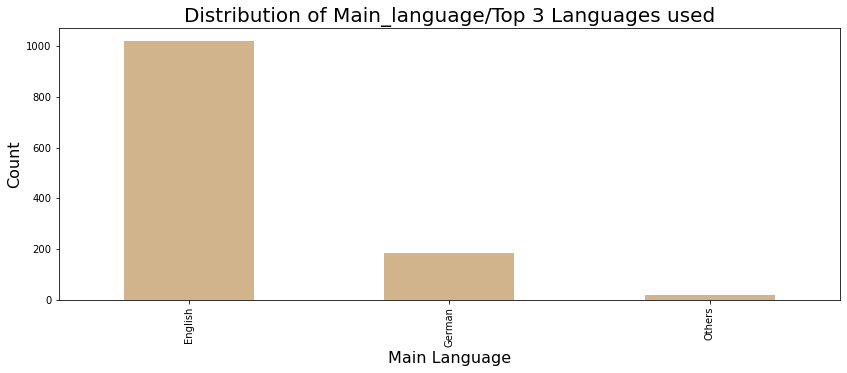

In [59]:
#Language_at_work
plt.figure(figsize=(14,5))
df['Language_at_work'].value_counts()[:3].plot(kind='bar',color='tan')
plt.title("Distribution of Main_language/Top 3 Languages used",fontsize=20)
plt.ylabel("Count",fontsize=16)
plt.xlabel("Main Language",fontsize=16)


In [60]:
df['Language_at_work'].value_counts()

English    1020
German      186
Others       19
Russian      12
Name: Language_at_work, dtype: int64

In [61]:
df['Language_at_work'].value_counts(normalize=True)*100

English    82.457559
German     15.036378
Others      1.535974
Russian     0.970089
Name: Language_at_work, dtype: float64

#### About 82% of the IT professionals communicate via English language making it the most commonly used language amongst IT professionals in the region.German is the second most common language with about 15% of professionals using it.

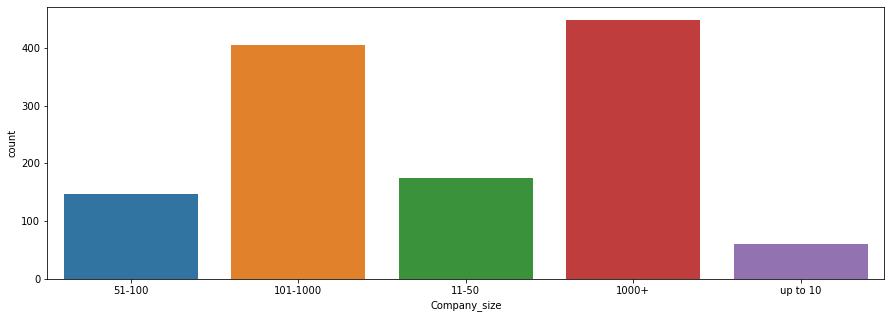

In [62]:
#Company_size
plt.figure(figsize=(15,5))
sns.countplot(df['Company_size'])
plt.show()

In [63]:
df['Company_size'].value_counts()

1000+       448
101-1000    405
11-50       174
51-100      147
up to 10     61
Name: Company_size, dtype: int64

In [64]:
df['Company_size'].value_counts(normalize=True)*100

1000+       36.275304
101-1000    32.793522
11-50       14.089069
51-100      11.902834
up to 10     4.939271
Name: Company_size, dtype: float64

#### About 36.2% IT professionals work in companies that have an employee size of over 1000,about 32% of them work at companies having employee size between 101-1000.

Text(0.5, 0, 'Count')

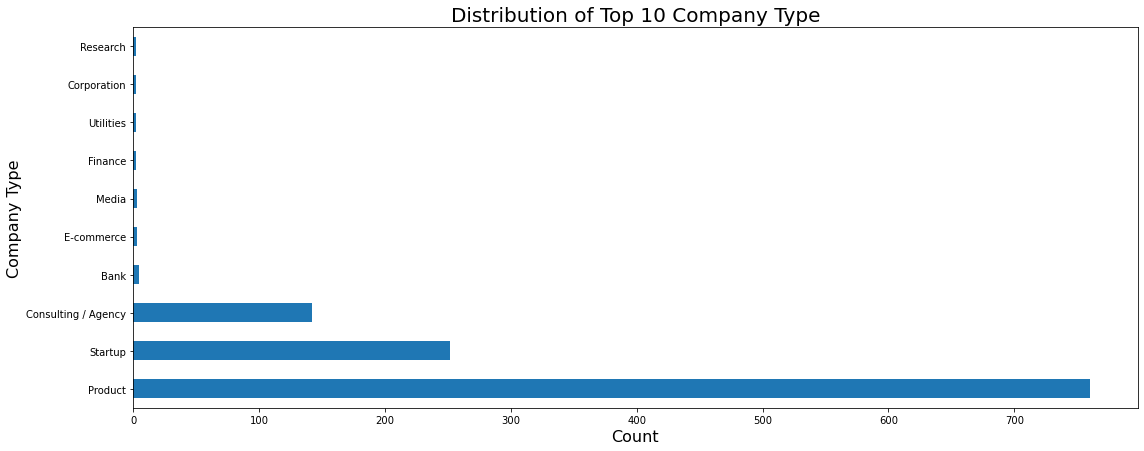

In [65]:
#Company_type
plt.figure(figsize=(18,7))
df['Company_type'].value_counts()[:10].plot(kind='barh')
plt.title("Distribution of Top 10 Company Type", fontsize = 20)
plt.ylabel("Company Type",fontsize = 16)
plt.xlabel("Count",fontsize = 16)

In [66]:
#Company_type
df['Company_type'].value_counts()[:10]

Product                760
Startup                252
Consulting / Agency    142
Bank                     5
E-commerce               3
Media                    3
Finance                  2
Utilities                2
Corporation              2
Research                 2
Name: Company_type, dtype: int64

In [67]:
df['Company_type'].value_counts(normalize=True)[:10]*100

Product                61.889251
Startup                20.521173
Consulting / Agency    11.563518
Bank                    0.407166
E-commerce              0.244300
Media                   0.244300
Finance                 0.162866
Utilities               0.162866
Corporation             0.162866
Research                0.162866
Name: Company_type, dtype: float64

In [68]:
df['Company_type'].value_counts()[:10]

Product                760
Startup                252
Consulting / Agency    142
Bank                     5
E-commerce               3
Media                    3
Finance                  2
Utilities                2
Corporation              2
Research                 2
Name: Company_type, dtype: int64

#### Approximately 61% of the professionals work at product based companies,about 20% of them work at Startups,and about 11% of them work at Consulting companies

### Important Inferences
##### 1) From the Age distribution we can say that majority of the IT Specialists lie in the age group of 28-33 years.
#### 2)Approximately 84% of the IT professionals are males and only 15.45% of them are females.The diverse gender is less than 1%.
#### 3)Approximately 54% of the IT professionals are from Berlin and about 18% from Munich
#### 4)For years_of experience we can see that the mean experience is of 8.9 years
#### 5)About 45% of the professionals belong to the senior level, about 29% at the middle level of seniority and about 13% of them belong to the lead category of Seniority level.
#### 6)Approximately 18% IT professionals have python as their main technology (most of the IT professionals have python as their main skill) followed by Java.
#### 7)The distribution is not normal,and the data is skewed for Yearly salary
#### 8)About 6.7% of the IT professionals receive an yearly salary of about 60,000 Euros.And about 2 % people also receive a salary of 100000 Euros.
#### 9)Majority of the IT professionals receive 30 vacation days during the year.
#### 10)About 92% of the professional are full time employees,2.2% of them are self employeed and about 0.64% of them work part time.
#### 11)About 94.6% of the professionals have unlimited contract while about 5% of them are on temporary contract.
#### 12)About 82% of the IT professionals communicate via English language making it the most commonly used language amongst IT professionals in the region.German is the second most common language with about 15% of professionals using it.
#### 13)About 36.2% IT professionals work in companies that have an employee size of over 1000,about 32% of them work at companies having employee size between 101-1000.
#### 14)Approximately 61% of the professionals work at product based companies,about 20% of them work at Startups,and about 11% of them work at Consulting companies



# Bivariate Analysis

In [69]:
#unique elements in each attribute
df.nunique()

Timestamp                      1248
Age                              41
Gender                            3
City                            119
Position                        148
Years_of_experience              34
Years_of_experience_Germany      53
Seniority_level                  24
Main_technology                 240
Other_technologies              562
Yearly_salary                   201
Yearly_bonus_and_stocks         168
Annual_salary_year_ago          147
Annual_bonus_and_stocks         131
Vacation_Days                    35
Employment_status                11
Сontract_duration                 3
Language_at_work                  4
Company_size                      5
Company_type                     63
job_lost_during_covid            10
shorter_working_week_hrs         23
additional_monetary_support      59
Salary_bin                        3
dtype: int64

In [70]:
# Gender and Salary
df.groupby("Gender").mean()["Yearly_salary"]

Gender
Diverse    1.445000e+05
Female     2.662480e+06
Male       7.384706e+04
Name: Yearly_salary, dtype: float64

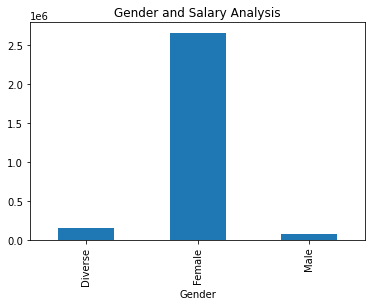

In [71]:
#Average Salary for Gender
df.groupby("Gender").mean()["Yearly_salary"].plot(kind='bar')
plt.title("Gender and Salary Analysis")
plt.show()

#### Female IT Professionals have a higher average salary than the Male IT professionals

In [72]:
# Gender and Age
df.groupby("Gender").mean()["Age"]

Gender
Diverse    27.500000
Female     31.098958
Male       32.147760
Name: Age, dtype: float64

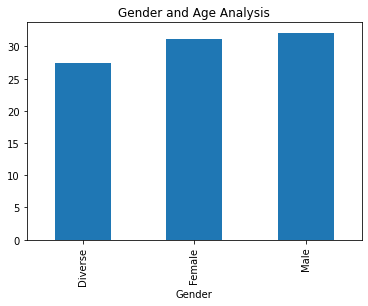

In [73]:
#Average Age for Gender
df.groupby("Gender").mean()["Age"].plot(kind='bar')
plt.title("Gender and Age Analysis")
plt.show()

#### Though the Average salary for females is greater than the male professionals but the average age of the male IT professionals is slightly greater than that of the female professionals.

In [74]:
# Gender and Years of Experience
df.groupby("Gender").mean()["Years_of_experience"]

Gender
Diverse    1.000000
Female     6.130208
Male       9.469971
Name: Years_of_experience, dtype: float64

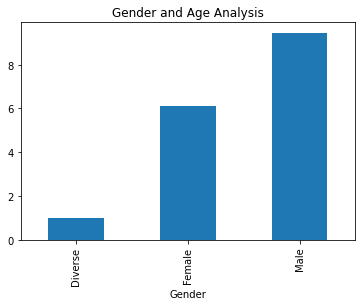

In [75]:
#Average Years of Experience for Gender
df.groupby("Gender").mean()["Years_of_experience"].plot(kind='bar')
plt.title("Gender and Age Analysis")
plt.show()

#### Male IT professionals have higher work experience as compared to the female and diverse IT professionals.

In [76]:
# Gender and Vacation Days
df.groupby("Gender").mean()["Vacation_Days"]

Gender
Diverse    22.500000
Female     26.625000
Male       26.624404
Name: Vacation_Days, dtype: float64

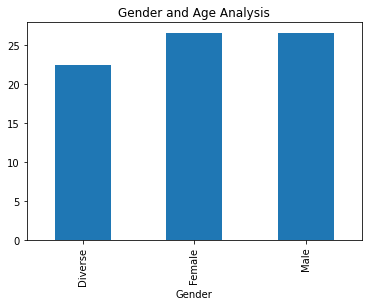

In [77]:
#Average Years of Vacation Days
df.groupby("Gender").mean()["Vacation_Days"].plot(kind='bar')
plt.title("Gender and Age Analysis")
plt.show()

#### The average vacation days received by both male and female IT Professionlas is almost the same,however it is less for the diverse gender group.

In [78]:
Gender=pd.crosstab(df['Gender'],df['Сontract_duration'])

In [79]:
Gender

Сontract_duration,0,Temporary contract,Unlimited contract
Gender,,,
Diverse,0,0,2
Female,0,11,178
Male,1,53,973


<AxesSubplot:xlabel='Gender'>

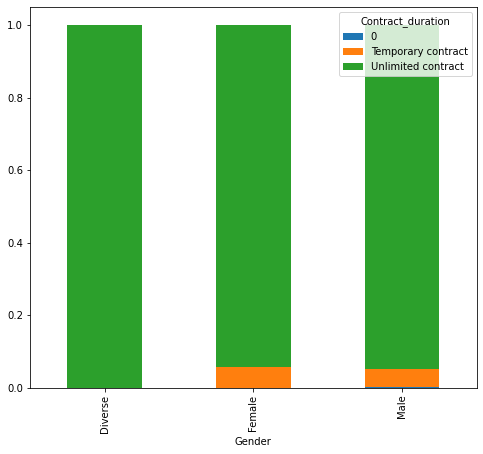

In [80]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,7))

#### More male IT professionals work on temporary contract as compared to female employees
#### About 973 males and 178 female professionals work on an unlimited contract 

In [81]:
Gender1=pd.crosstab(df['Gender'],df['Company_size'])

In [82]:
Gender1

Company_size,1000+,101-1000,11-50,51-100,up to 10
Gender,,,,,
Diverse,2,0,0,0,0
Female,78,61,26,19,7
Male,365,343,148,126,54


<AxesSubplot:xlabel='Gender'>

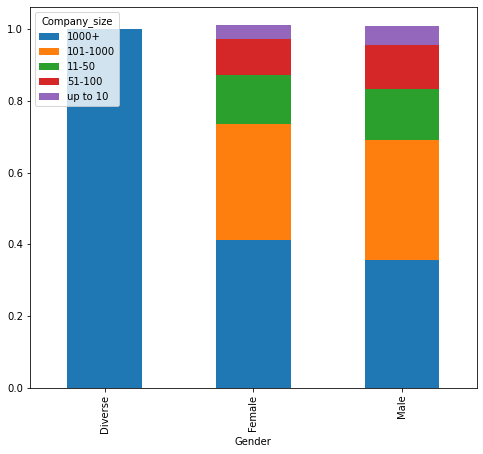

In [83]:
Gender1.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,7))

#### 

In [85]:
# City and Salary analysis
occup1 = pd.DataFrame(df.groupby("City").mean()["Yearly_salary"])
occup1

,Yearly_salary
City,
Aachen,40082.000000
Amsterdam,74538.888889
Ansbach,42000.000000
Barcelona,31000.000000
Basel,115000.000000
...,...
Wroclaw,36000.000000
Würzburg,75000.000000
Zurich,123300.000000


In [86]:
df.groupby("City").mean()["Yearly_salary"]


City
Aachen        40082.000000
Amsterdam     74538.888889
Ansbach       42000.000000
Barcelona     31000.000000
Basel        115000.000000
                 ...      
Wroclaw       36000.000000
Würzburg      75000.000000
Zurich       123300.000000
Zürich        35000.000000
warsaw        50000.000000
Name: Yearly_salary, Length: 119, dtype: float64

In [87]:
# Seniority level and Age analysis
occup4 = pd.DataFrame(df.groupby("Seniority_level").mean()["Age"])
occup4

,Age
Seniority_level,
C-Level,36.000000
C-level executive manager,31.000000
CTO,32.000000
Director,33.000000
Entry level,23.000000
Head,35.886364
Intern,22.000000
Junior,28.303797
Key,28.000000


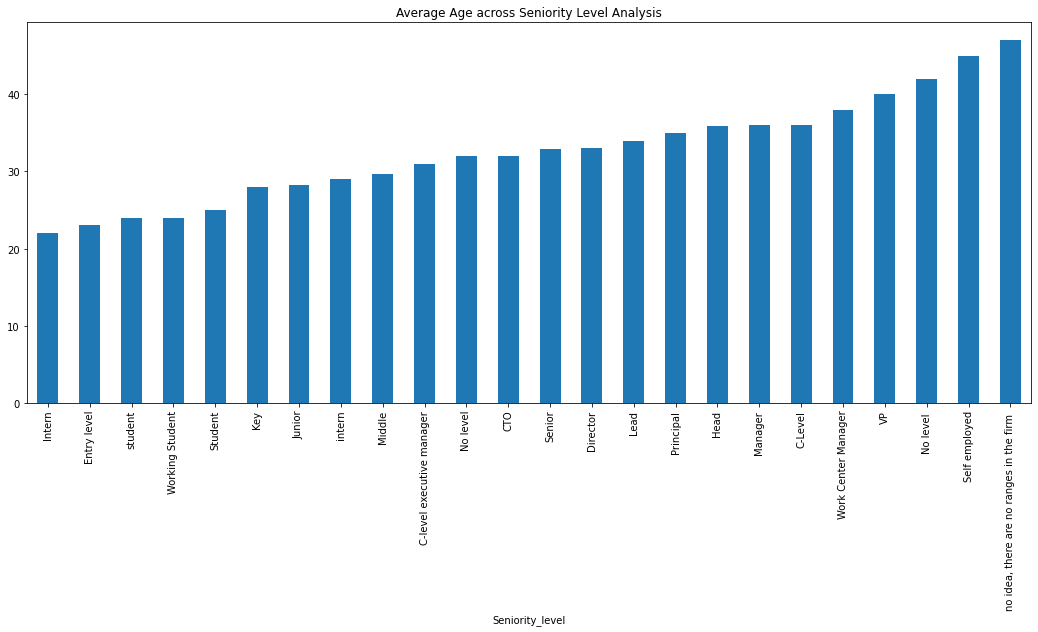

In [88]:
plt.figure(figsize=(18,7))
df.groupby("Seniority_level").mean()["Age"].sort_values().plot(kind='bar')
plt.title("Average Age across Seniority Level Analysis")
plt.show()

#### The average age for self employed is the highest

In [89]:
# Seniority level and Years of Experience
occup5 = pd.DataFrame(df.groupby("Seniority_level").mean()["Years_of_experience"])
occup5

,Years_of_experience
Seniority_level,
C-Level,0.000000
C-level executive manager,10.000000
CTO,10.000000
Director,10.000000
Entry level,4.000000
Head,21.318182
Intern,2.000000
Junior,2.544304
Key,4.000000


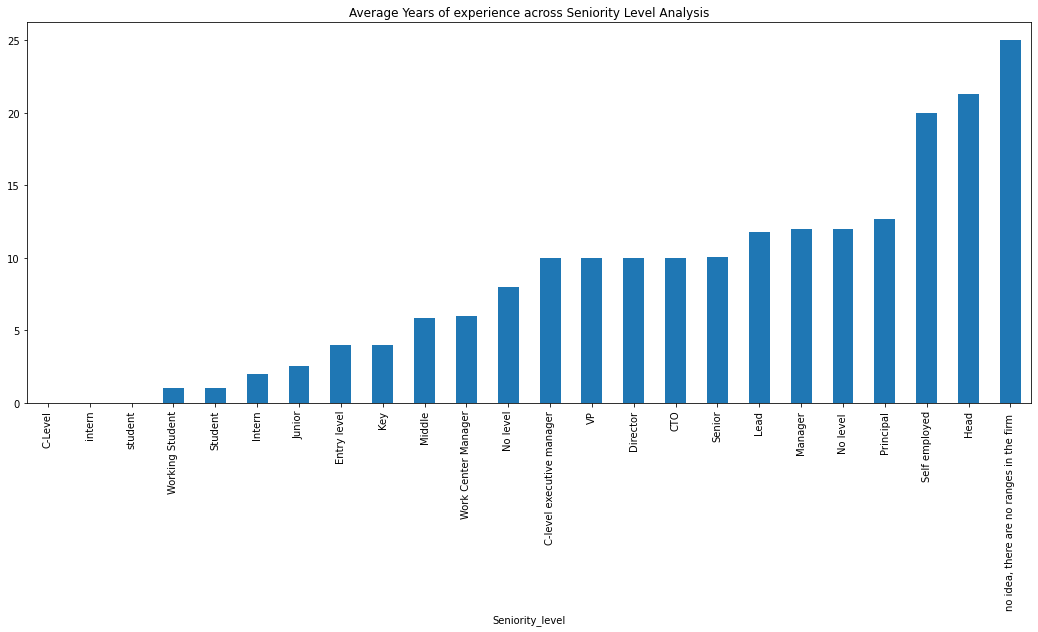

In [99]:
plt.figure(figsize=(18,7))
df.groupby("Seniority_level").mean()["Years_of_experience"].sort_values().plot(kind='bar')
plt.title("Average Years of experience across Seniority Level Analysis")
plt.show()

#### The Professionals at the Head level have the highest years of experience

In [90]:
# Seniority level and Salary analysis
occup6 = pd.DataFrame(df.groupby("Seniority_level").mean()["Yearly_salary"])
occup6

,Yearly_salary
Seniority_level,
C-Level,1.500000e+05
C-level executive manager,1.150000e+05
CTO,2.000000e+05
Director,1.000000e+05
Entry level,5.417900e+04
Head,1.007614e+05
Intern,3.500000e+04
Junior,4.998056e+04
Key,5.700000e+04


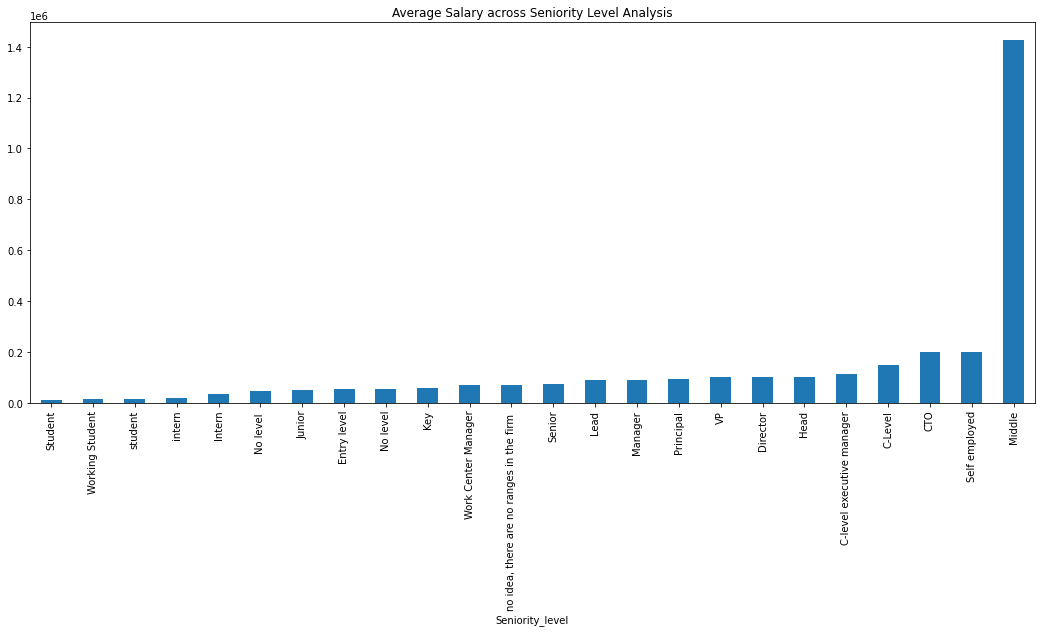

In [91]:
plt.figure(figsize=(18,7))
df.groupby("Seniority_level").mean()["Yearly_salary"].sort_values().plot(kind='bar')
plt.title("Average Salary across Seniority Level Analysis")
plt.show()

#### Amongst the hierarchy of levels(Seniority level) the IT professionals at the middle have the highest average salary.

In [92]:
# Seniority level and Vacation Days analysis
occup7 = pd.DataFrame(df.groupby("Seniority_level").mean()["Vacation_Days"])
occup7

,Vacation_Days
Seniority_level,
C-Level,30.000000
C-level executive manager,25.000000
CTO,28.000000
Director,30.000000
Entry level,0.000000
Head,25.090909
Intern,0.000000
Junior,26.291139
Key,0.000000


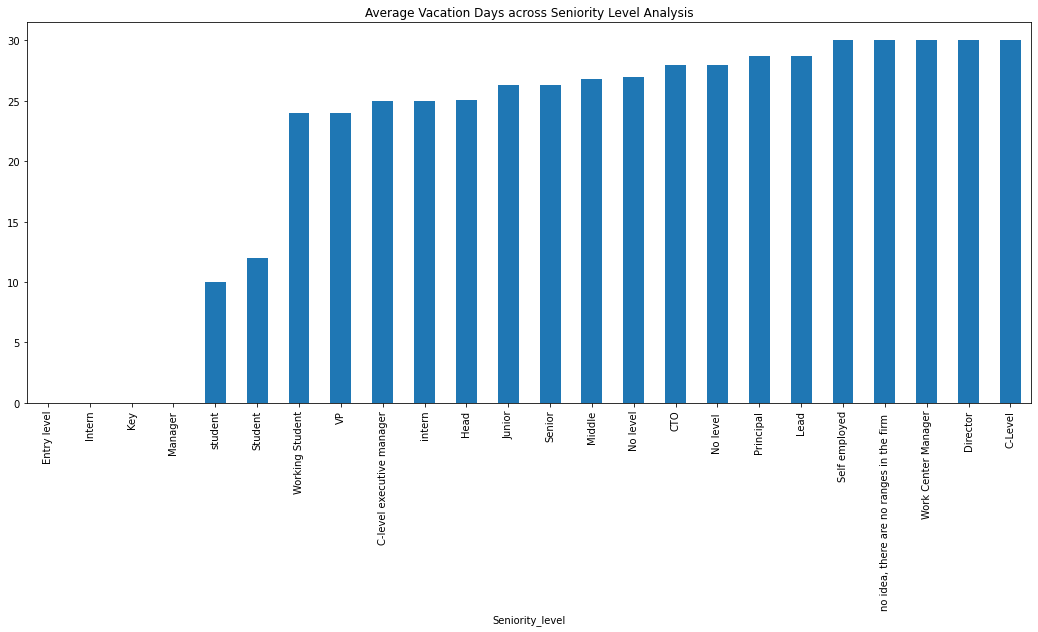

In [93]:
plt.figure(figsize=(18,7))
df.groupby("Seniority_level").mean()["Vacation_Days"].sort_values().plot(kind='bar')
plt.title("Average Vacation Days across Seniority Level Analysis")
plt.show()

#### Professionals at influential positions in the IT industry enjoy more vacations as compared to students ,interns and juniors

In [94]:
# Employment status and Salary analysis
occup8 = pd.DataFrame(df.groupby("Employment_status").mean()["Yearly_salary"])
occup8

,Yearly_salary
Employment_status,
Company Director,110000.000000
Founder,75000.000000
Full-time employee,491472.715126
"Full-time position, part-time position, & self-employed (freelancing, tutoring)",54179.000000
Intern,35000.000000
Part-time employee,45623.125000
Self-employed (freelancer),105978.607143
Werkstudent,11500.000000
Working Student,14400.000000


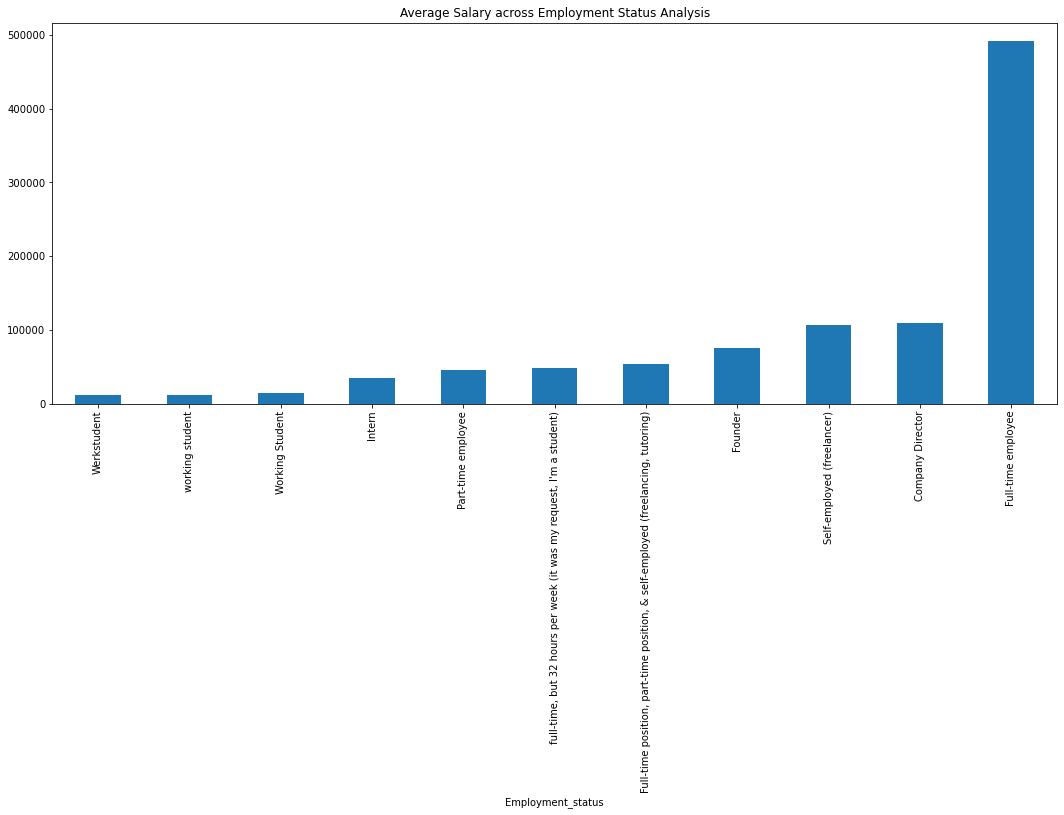

In [95]:
plt.figure(figsize=(18,7))
df.groupby("Employment_status").mean()["Yearly_salary"].sort_values().plot(kind='bar')
plt.title("Average Salary across Employment Status Analysis")
plt.show()

#### The full time IT Professionals have a higher salary.

In [96]:
# Employment status and Age analysis
occup9 = pd.DataFrame(df.groupby("Employment_status").mean()["Age"])
occup9

,Age
Employment_status,
Company Director,48.000000
Founder,39.333333
Full-time employee,31.943697
"Full-time position, part-time position, & self-employed (freelancing, tutoring)",23.000000
Intern,22.000000
Part-time employee,28.500000
Self-employed (freelancer),31.964286
Werkstudent,24.000000
Working Student,24.000000


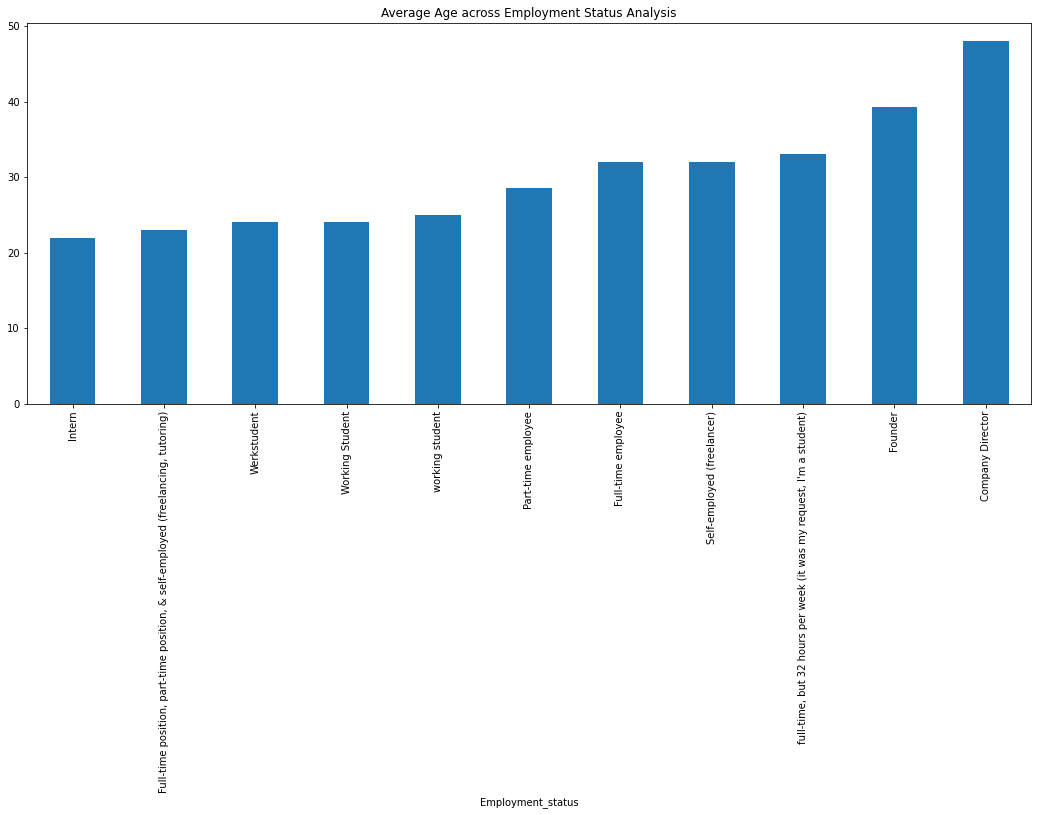

In [97]:
plt.figure(figsize=(18,7))
df.groupby("Employment_status").mean()["Age"].sort_values().plot(kind='bar')
plt.title("Average Age across Employment Status Analysis")
plt.show()

#### The mean age for the Company Director is the highest.

In [98]:
# Employment status and Years of Experience analysis
occup10 = pd.DataFrame(df.groupby("Employment_status").mean()["Years_of_experience"])
occup10

,Years_of_experience
Employment_status,
Company Director,23.000000
Founder,17.666667
Full-time employee,8.615126
"Full-time position, part-time position, & self-employed (freelancing, tutoring)",4.000000
Intern,2.000000
Part-time employee,6.500000
Self-employed (freelancer),11.178571
Werkstudent,0.000000
Working Student,1.000000


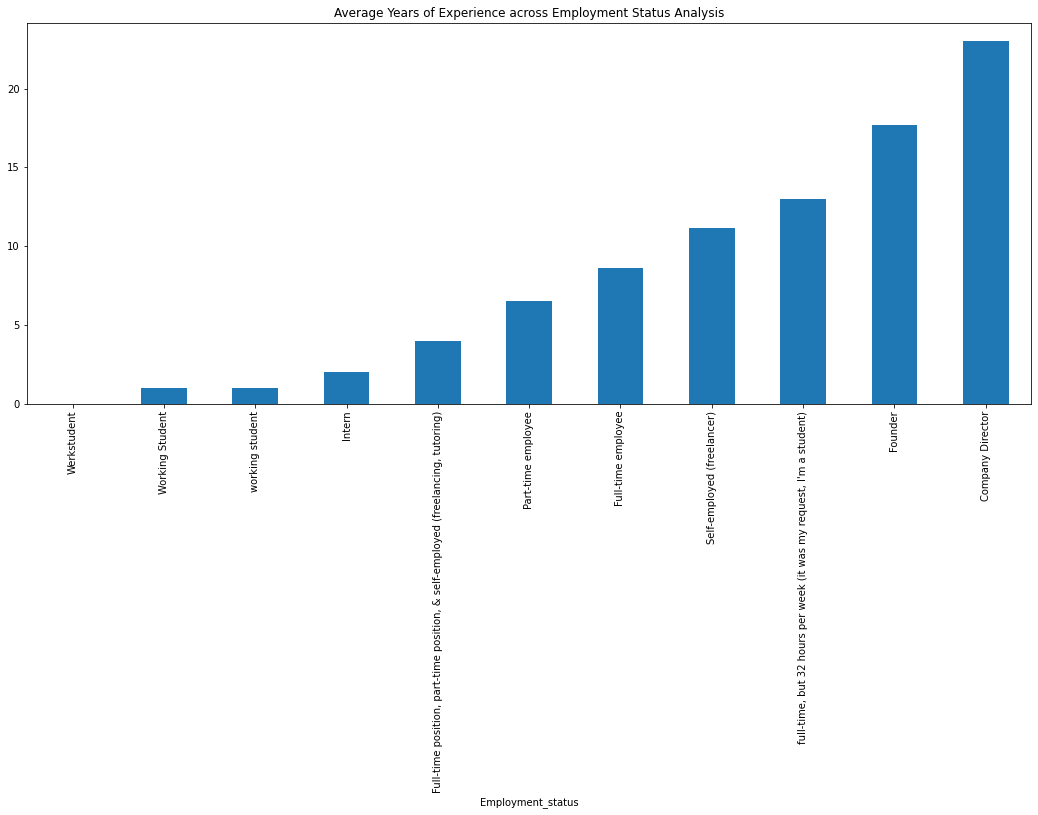

In [99]:
plt.figure(figsize=(18,7))
df.groupby("Employment_status").mean()["Years_of_experience"].sort_values().plot(kind='bar')
plt.title("Average Years of Experience across Employment Status Analysis")
plt.show()

#### The Company Director has the highest average years of experience in terms of employment

In [100]:
# Employment status and Vacation Days analysis
occup11 = pd.DataFrame(df.groupby("Employment_status").mean()["Vacation_Days"])
occup11

,Vacation_Days
Employment_status,
Company Director,0.000000
Founder,10.000000
Full-time employee,27.124370
"Full-time position, part-time position, & self-employed (freelancing, tutoring)",0.000000
Intern,0.000000
Part-time employee,21.125000
Self-employed (freelancer),20.321429
Werkstudent,24.000000
Working Student,24.000000


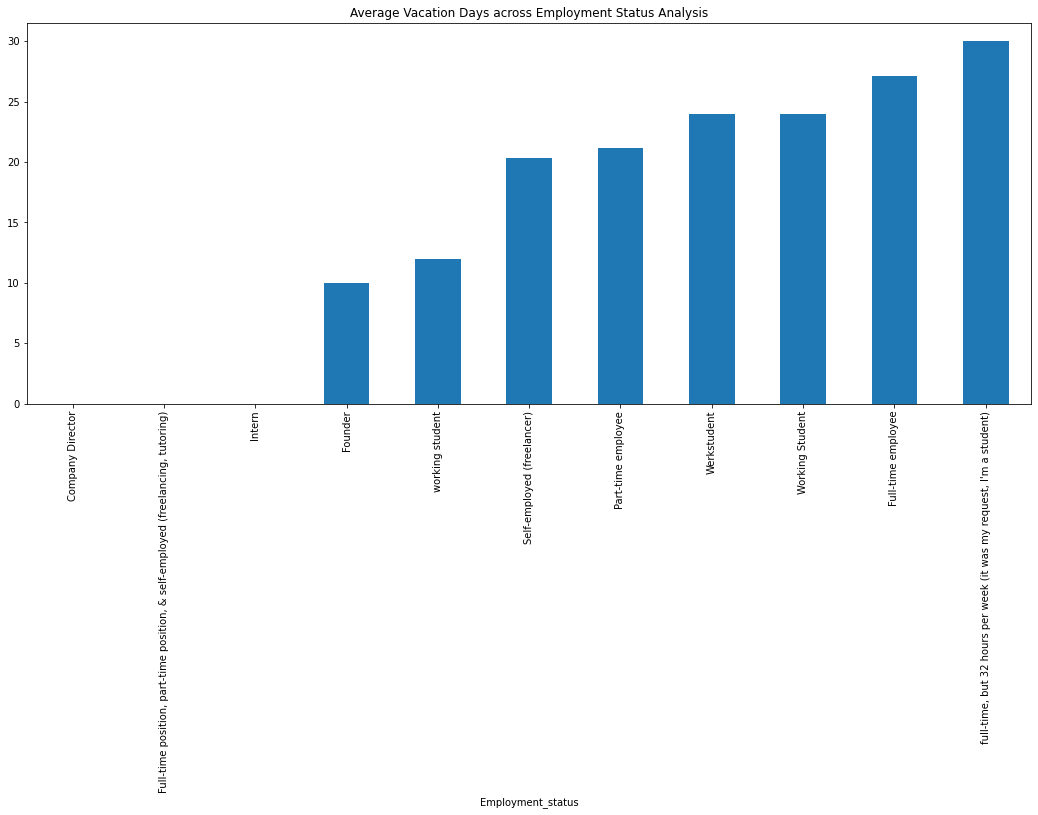

In [101]:
plt.figure(figsize=(18,7))
df.groupby("Employment_status").mean()["Vacation_Days"].sort_values().plot(kind='bar')
plt.title("Average Vacation Days across Employment Status Analysis")
plt.show()

#### Professionals who work full time have more vacation days

In [102]:
# Contract Duration and Years of Experience analysis
occup12 = pd.DataFrame(df.groupby("Сontract_duration").mean()["Years_of_experience"])
occup12

,Years_of_experience
Сontract_duration,
0,20.000000
Temporary contract,7.125000
Unlimited contract,8.728214


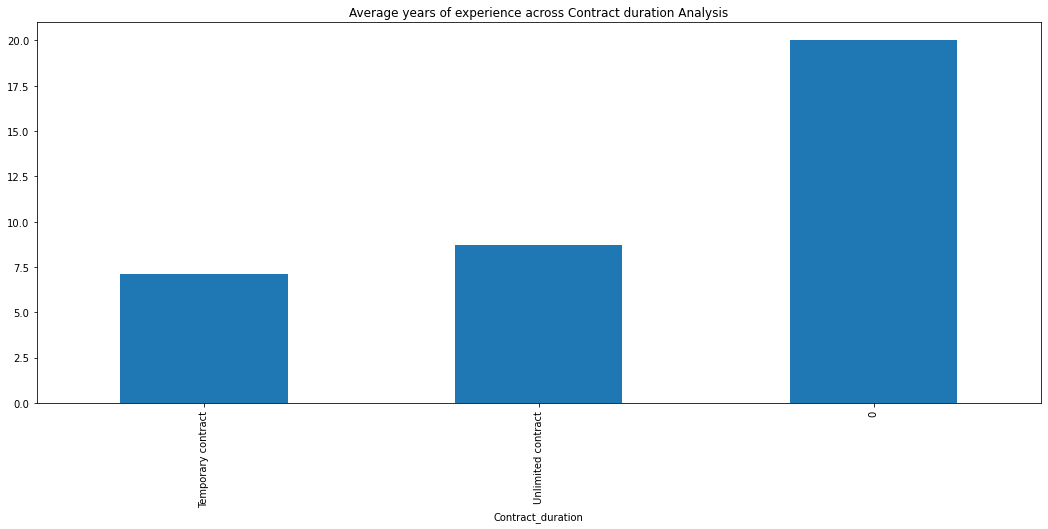

In [103]:
plt.figure(figsize=(18,7))
df.groupby("Сontract_duration").mean()["Years_of_experience"].sort_values().plot(kind='bar')
plt.title("Average years of experience across Contract duration Analysis")
plt.show()

#### Professionals with unlimited contract have more Average years of experience.

In [104]:
# Contract Duration and Salary analysis
occup13 = pd.DataFrame(df.groupby("Сontract_duration").mean()["Yearly_salary"])
occup13

,Yearly_salary
Сontract_duration,
0,200000.000000
Temporary contract,63377.890625
Unlimited contract,503035.855047


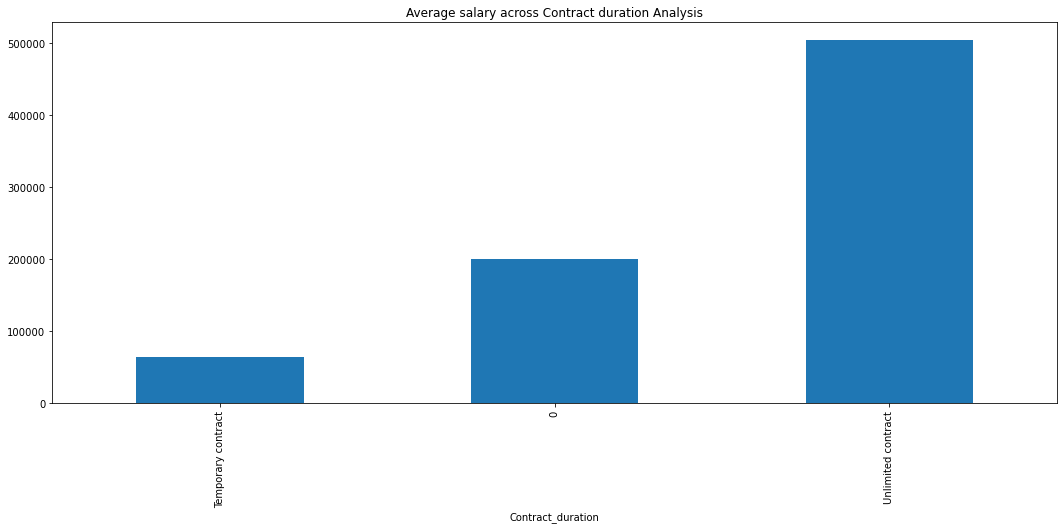

In [105]:
plt.figure(figsize=(18,7))
df.groupby("Сontract_duration").mean()["Yearly_salary"].sort_values().plot(kind='bar')
plt.title("Average salary across Contract duration Analysis")
plt.show()

#### Average salary for IT professionals having unlimited contract is the highest.

In [108]:
# Contract Duration and Age analysis
occup14 = pd.DataFrame(df.groupby("Сontract_duration").mean()["Age"])
occup14

,Age
Сontract_duration,
0,38.000000
Temporary contract,30.375000
Unlimited contract,32.037964


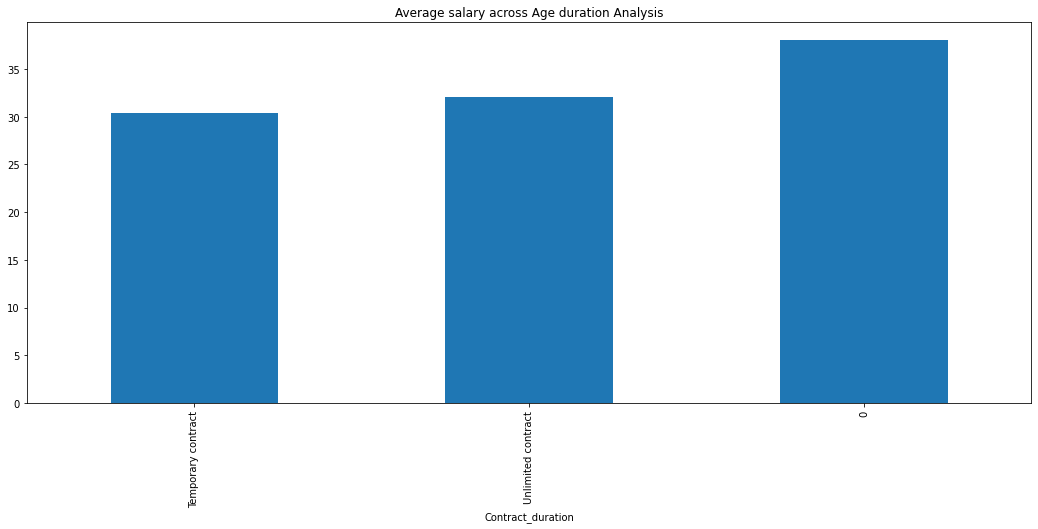

In [109]:
plt.figure(figsize=(18,7))
df.groupby("Сontract_duration").mean()["Age"].sort_values().plot(kind='bar')
plt.title("Average salary across Age duration Analysis")
plt.show()

#### Average age for professionals working on temporary contract basis and unlimited contract is the same.

In [110]:
# Contract Duration and Vacation Days analysis
occup15 = pd.DataFrame(df.groupby("Сontract_duration").mean()["Vacation_Days"])
occup15

,Vacation_Days
Сontract_duration,
0,0.000000
Temporary contract,23.062500
Unlimited contract,27.173425


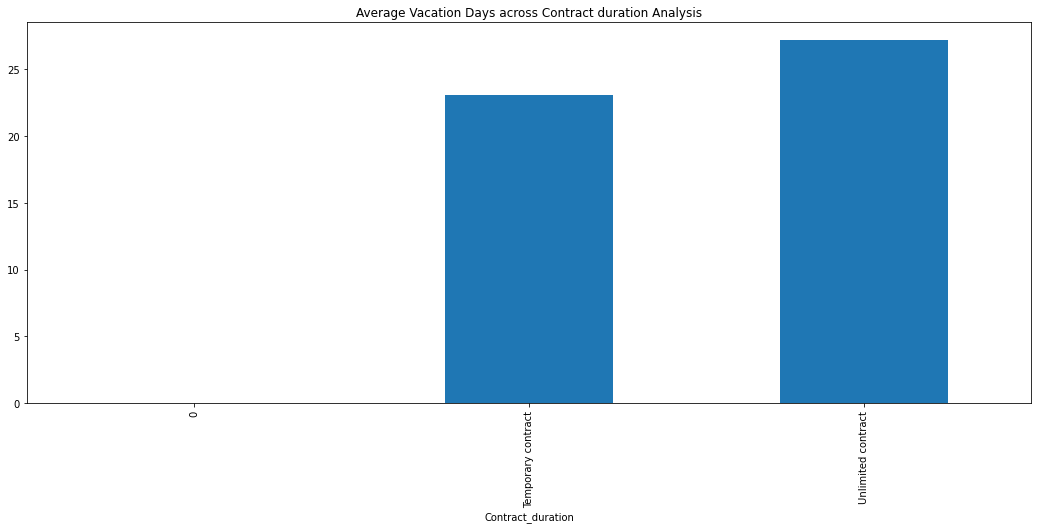

In [111]:
plt.figure(figsize=(18,7))
df.groupby("Сontract_duration").mean()["Vacation_Days"].sort_values().plot(kind='bar')
plt.title("Average Vacation Days across Contract duration Analysis")
plt.show()

#### IT Professionals having unlimited contract enjoy more number of vacation days.

In [112]:
#Correlation
df.corr()

,Age,Years_of_experience,Yearly_salary,Annual_salary_year_ago,Vacation_Days,shorter_working_week_hrs
Age,1.000000,0.376016,0.117141,-0.017596,0.081490,-0.013013
Years_of_experience,0.376016,1.000000,0.016473,-0.049856,-0.032193,-0.009356
Yearly_salary,0.117141,0.016473,1.000000,0.999998,0.095389,-0.044144
Annual_salary_year_ago,-0.017596,-0.049856,0.999998,1.000000,0.372757,-0.050298
Vacation_Days,0.081490,-0.032193,0.095389,0.372757,1.000000,0.008761
shorter_working_week_hrs,-0.013013,-0.009356,-0.044144,-0.050298,0.008761,1.000000


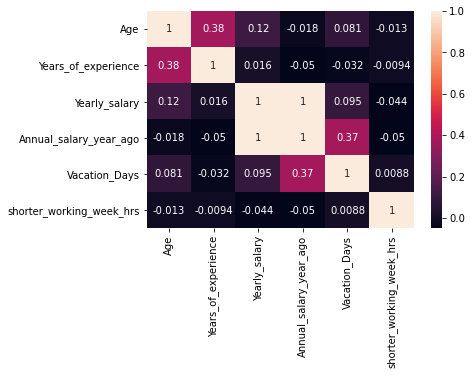

In [113]:
#Heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

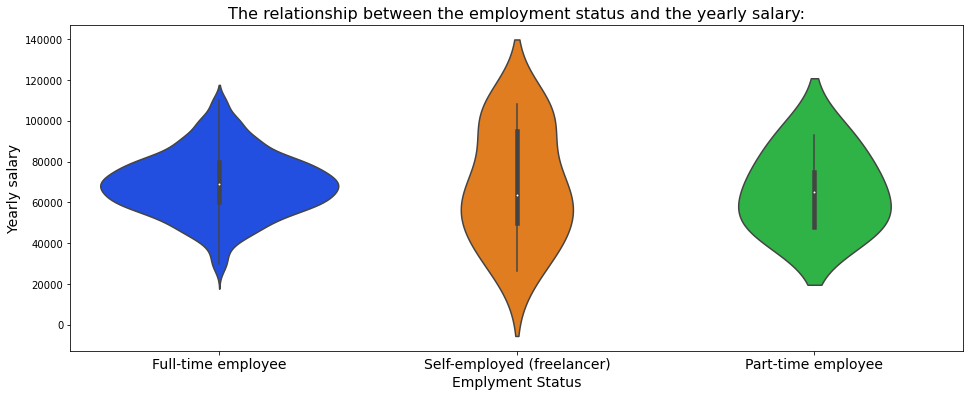

In [114]:
# the relationship between the employment status and the yearly salary:

plt.figure(figsize = (16, 6))
sns.violinplot(data = status, x= 'Employment_status', y= 'Yearly_salary', palette = 'bright')
plt.title('The relationship between the employment status and the yearly salary:', fontsize = 16)
plt.xlabel('Emplyment Status',fontsize=14)
plt.ylabel('Yearly salary', fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

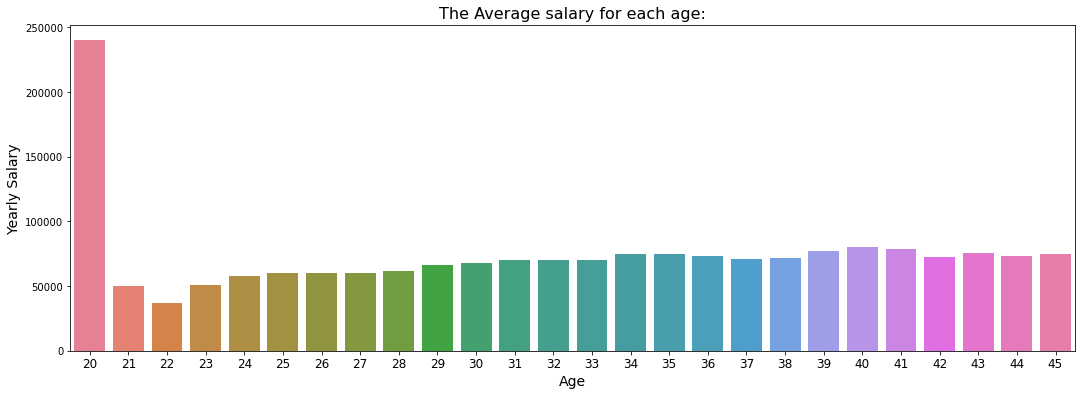

In [115]:
# Average salary for age
age_salary = age.groupby('Age', as_index = False).median()
plt.figure(figsize=(18, 6))
sns.barplot(data= age_salary, x= 'Age', y= 'Yearly_salary',palette= 'husl')
plt.title('The Average salary for each age:', fontsize= 16)
plt.xlabel('Age', fontsize= 14)
plt.ylabel('Yearly Salary', fontsize = 14)
plt.xticks(fontsize= 12)
plt.show()

In [116]:
# Multivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Gender'>

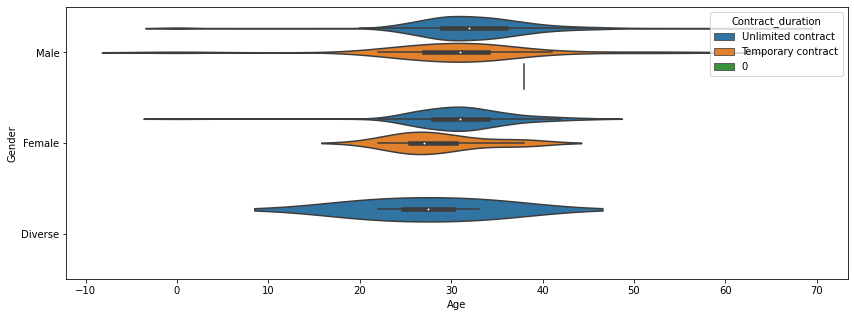

In [117]:
## Violinplot
plt.figure(figsize = (14, 5))
sns.violinplot(x="Age", 
               y="Gender",
               hue="Сontract_duration",
               data=df)

In [118]:
# the realation between the seniority level and years of experience:

experience['Seniority_level'].value_counts()

Senior                       555
Middle                       365
Lead                         161
Junior                        79
Head                          40
Principal                      3
No level                       1
VP                             1
C-Level                        1
Entry level                    1
Work Center Manager            1
Key                            1
Self employed                  1
C-level executive manager      1
CTO                            1
Student                        1
Working Student                1
student                        1
Intern                         1
Director                       1
Manager                        1
No level                       1
intern                         1
Name: Seniority_level, dtype: int64

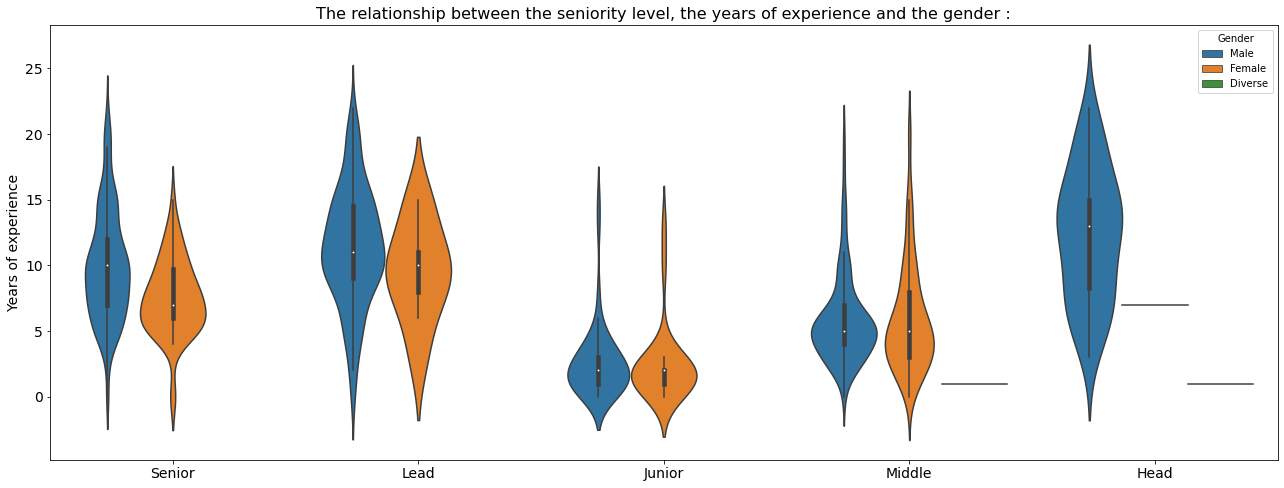

In [119]:
experience_seniority = experience.loc[experience['Seniority_level'].isin(['Senior', 'Middle','Lead', 'Junior', 'Head'])]


plt.figure(figsize=(22, 8))
sns.violinplot(data= experience_seniority, x='Seniority_level', y= 'Years_of_experience',hue= 'Gender')
plt.title('The relationship between the seniority level, the years of experience and the gender :', fontsize = 16)
plt.xlabel('')
plt.ylabel('Years of experience' ,fontsize= 14)
plt.xticks(fontsize= 14)
plt.yticks(fontsize = 14)
plt.show()

#### There are no female professionals at the Head level.

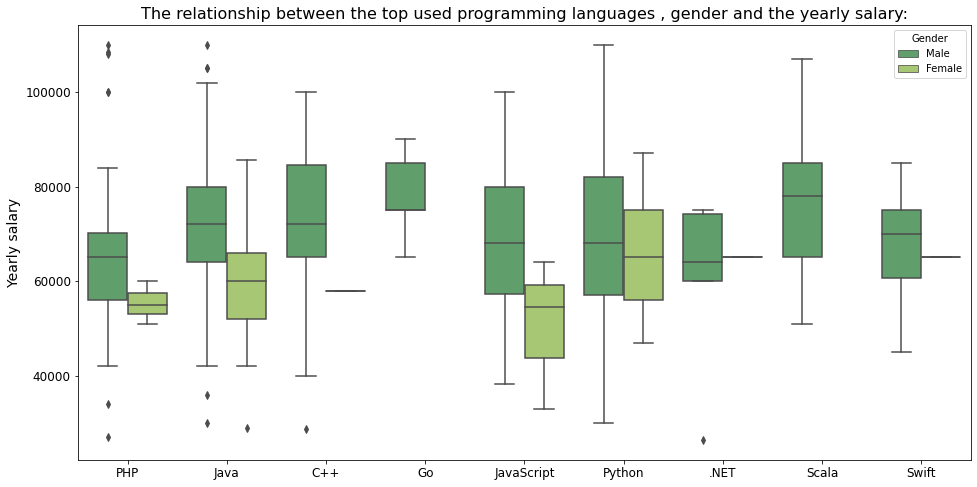

In [148]:
# the relationship between the programming languages , gender and the yearly salary:

salary_language = salary.loc[salary['Main_technology'].isin(['Python', 'Java', 'JavaScript', 'PHP', 'C++', 'Scala', 'Swift', '.NET', 'Go'])]

plt.figure(figsize = (16,8))
sns.boxplot(data = salary_language, x = 'Main_technology', y= 'Yearly_salary', hue = 'Gender', palette = 'summer')
plt.title('The relationship between the top used programming languages , gender and the yearly salary:', fontsize = 16)
plt.xlabel('')
plt.ylabel('Yearly salary', fontsize= 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [ ]:
####

In [ ]:
# error
sns.lmplot(x="Years_of_experience",
               y="Seniority_level", 
               hue="Gender",
               data=df)

In [ ]:
# error
sns.swarmplot(x="Seniority_level", 
              y="Gender", 
              data=df)

In [ ]:
# The top 10 cities pay the higher salary:

salary_city = salary.groupby('City', as_index= False).mean().sort_values('Yearly_salary', ascending = False) 
# sort cities according to the salary


salary_city = salary_city.head(10)
plt.figure(figsize = (16,6))
ax = sns.barplot(data= df, x= 'City', y= 'Yearly_salary',palette= 'magma')
plt.title('The top 10 cities pay higher salary', fontsize= 16)
plt.xlabel('City', fontsize = 14)
plt.ylabel('Average yearly salary', fontsize= 14)
plt.xticks(fontsize= 12, rotation= 45)
plt.yticks(fontsize = 12)
plt.bar_label(ax.containers[0], label_type = 'edge',fontsize = 12)
plt.show()